In [112]:
import numpy as np
from scipy import stats
from scipy.integrate import quad
from matplotlib import pyplot as plt

Black body radiation formula:

$$B(\lambda, T) = \frac{2hc^2}{\lambda^5} \cdot \frac{1}{e^{\frac{hc}{\lambda k_B T}} - 1}$$


In [13]:
h = 6.626e-34  # Planck's constant (Joule second)
c = 3.0e8      # Speed of light (meters per second)
k_B = 1.381e-23 # Boltzmann constant (Joule per Kelvin)
sigma_SB = 5.67e-8 #Stefan-Boltzmann constant (Watt per meter squared per kelvin^-4)

In [121]:

#takes log lambda
#gives log spectrum

def planck_function(wavelength,T):
    return 2 * h * c**2 / wavelength**5 / (np.exp(h * c / (wavelength * k_B * T)) - 1)

def log_black_body_pdf(log_wavelength, T):
    wavelength = 10**log_wavelength
    norm, _ = quad(lambda lw: planck_function(lw,T), 1e-9, 1e1)
    return np.log10(planck_function(wavelength,T))




In [122]:
#print(log_black_body(-4, T))
print(log_black_body_pdf(-4, T))


5.915215580372702


/tmp/ipykernel_49340/550216523.py:9: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  norm, _ = quad(lambda lw: planck_function(lw,T), 1e-9, 1e1)


In [110]:
## sample with Metropolis-Hastings algorithm 

def sampler(N, log_lambda_init=-5, proposal_width=0.5):
    
    log_lambda_current = log_lambda_init
    log_lambda_sampled = [log_lambda_current]
    
    for i in range(N):
        # suggest new lambda
        # changing the width of this distribution changes how big the jump is between trials.
        log_lambda_proposal = stats.norm(log_lambda_current, proposal_width).rvs()

        p_current = log_black_body_pdf(log_lambda_current, T)
        p_proposal = log_black_body_pdf(log_lambda_proposal, T)

        print(p_proposal)
        
        # Accept proposal?
        p_accept = p_proposal / p_current

        if p_accept > np.random.rand():
            log_lambda_current = log_lambda_proposal
        
        log_lambda_sampled.append(log_lambda_current)
        
    return log_lambda_sampled

In [114]:
T = 1e4
spectrum = sampler(N=20, log_lambda_init=4, proposal_width=0.5)



nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


/tmp/ipykernel_49340/3511662278.py:6: RuntimeWarning: overflow encountered in exp
  planck_function = 2 * h * c**2 / wavelength**5 / (np.exp(h * c / (wavelength * k_B * T)) - 1)
/tmp/ipykernel_49340/3511662278.py:7: RuntimeWarning: divide by zero encountered in log10
  return np.log10(planck_function)
/tmp/ipykernel_49340/3511662278.py:10: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  norm, _ = quad(lambda lw: log_black_body(lw, T), -9, 1)


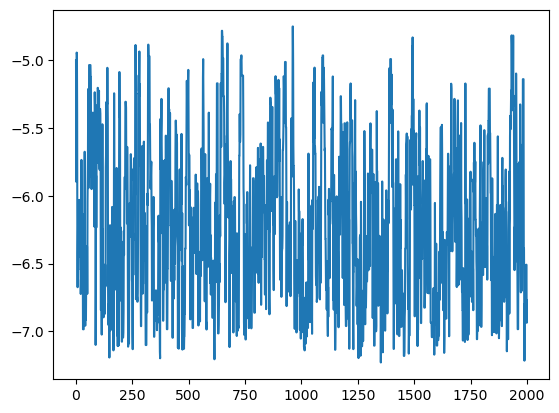

In [100]:
plt.plot(spectrum)

In [95]:
print(spectrum)

[-5, -5.430701390074094, -5.841411844363224, -6.101251643133867, -6.3343258877765685, -6.250897059293304, -6.152360568034553, -6.635416783149643, -6.585531432364674, -6.025205174780382, -5.4926492490055345, -5.797255454424828, -5.096240514852985, -5.02924346475119, -4.979640592761694, -5.562143019958405, -5.478989192749431, -5.264281834670217, -5.264281834670217, -5.264281834670217, -5.301972084085138, -5.301972084085138, -5.301972084085138, -5.301972084085138, -5.550341457898626, -5.550341457898626, -5.550341457898626, -5.938994594526105, -5.674568352584253, -5.674568352584253, -6.0985847173237575, -6.446517961230338, -6.8300998041167045, -6.8300998041167045, -6.369736652614193, -6.369736652614193, -6.369736652614193, -6.685413763568161, -6.685413763568161, -6.685413763568161, -6.333697095714536, -6.642283149513345, -6.468109170416689, -6.554197565509555, -5.85967942157625, -6.160940935108051, -5.8707032452528045, -5.744011367649205, -5.8113508154207665, -5.9310239428724, -5.931023942

(array([ 10.,  12.,  12.,  54., 102., 207., 317., 447., 418., 422.]),
 array([-4.        , -2.58884713, -1.17769425,  0.23345862,  1.6446115 ,
         3.05576437,  4.46691725,  5.87807012,  7.289223  ,  8.70037587,
        10.11152875]),
 <BarContainer object of 10 artists>)

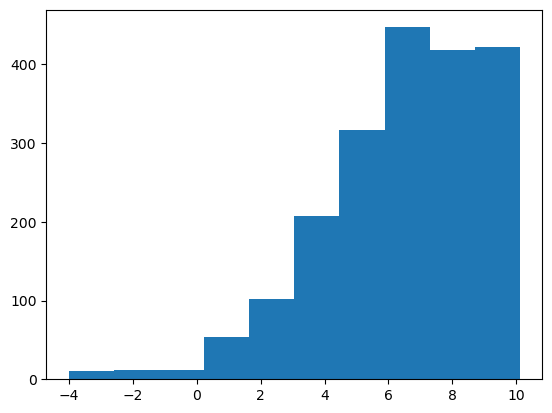

In [103]:

num_bins = 100  # Number of bins

#spectrum = np.array(spectrum)
#spectrum = spectrum[spectrum>0]

# Generate log-spaced bins from the minimum to maximum of the data
#log_bins = np.logspace(np.log10(min(spectrum)), np.log10(max(spectrum)), num_bins)

# Plot histogram with log-spaced bins
plt.hist(spectrum)


/tmp/ipykernel_49340/550216523.py:9: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  norm, _ = quad(lambda lw: planck_function(lw,T), 1e-9, 1e1)
/tmp/ipykernel_49340/550216523.py:5: RuntimeWarning: overflow encountered in exp
  return 2 * h * c**2 / wavelength**5 / (np.exp(h * c / (wavelength * k_B * T)) - 1)
/tmp/ipykernel_49340/550216523.py:10: RuntimeWarning: divide by zero encountered in log10
  return np.log10(planck_function(wavelength,T))


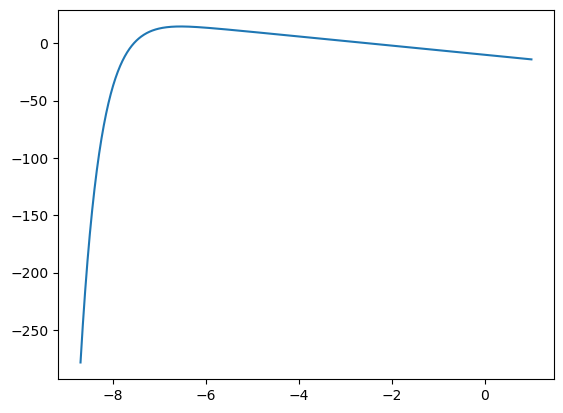

In [123]:
wavelength_grid = np.linspace(-9,1,1000)

#print(black_body_norm(wavelength_grid, T))

plt.plot(wavelength_grid,log_black_body_pdf(wavelength_grid, T));
#plt.xscale("log")
#plt.yscale("log")
#plt.ylim(-1,10)
